# Practice3 (test_submission1_4, 2_4.csv)
> Public Score
> - test_submission1_3: 25136.09206
> - test_submission2_3: 28583.13469

In [311]:
import sys, os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# column 보기 30개로 설정
pd.set_option('display.max_columns', 30)

In [312]:
# 데이터 경로 설정
file_path = os.path.join("c:\\Users\\prohe\\OneDrive\\바탕 화면\\알고리즘PBL2\\", 'data')
train_origin = pd.read_csv(file_path+'\dataset.csv')
test_origin = pd.read_csv(file_path+'\problem.csv')

In [313]:
train_origin.shape, test_origin.shape

((1340, 24), (130, 23))

In [314]:
# 전처리를 위한 원본 데이터 복사
train = train_origin.copy()
test = test_origin.copy()

In [315]:
# 메모리를 효율적으로 사용하기 위한 downcast 함수 정의
def downcast(df, verbose=True):     # verbose 옵션 추가: (True)인 경우 몇 퍼센트 압축됐는지 출력
    start_mem = df.memory_usage().sum() / 1024**2   # 초기 메모리 사용량
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2

    if verbose:
        print(f'{(100*(start_mem - end_mem) / start_mem):.1f}% 압축됨')

    return df

In [316]:
downcast(train)
downcast(test)

67.2% 압축됨
68.7% 압축됨


,Id,LotArea,Street,LotConfig,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold
0,1341,11200,Pave,Inside,5,5,1965,1965,1040,1040,0,1040,1,0,3,1,5,0,Detchd,1965,1,384,2008
1,1342,7200,Pave,Corner,5,7,1951,2000,900,900,0,900,1,0,3,1,5,0,Detchd,2005,2,576,2010
2,1343,16905,Pave,Inside,5,6,1959,1959,1350,1328,0,1328,1,1,2,1,5,2,Attchd,1959,1,308,2007
3,1344,9180,Pave,CulDSac,5,7,1983,1983,840,884,0,884,1,0,2,1,5,0,Attchd,1983,2,504,2007
4,1345,7200,Pave,Inside,5,7,1920,1996,530,581,530,1111,1,0,3,1,6,0,Detchd,1935,1,288,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1466,11478,Pave,Inside,8,5,2007,2008,1704,1704,0,1704,2,0,3,1,7,1,Attchd,2008,3,772,2010
126,1467,16321,Pave,CulDSac,5,6,1957,1997,1484,1600,0,1600,1,0,2,1,6,2,Attchd,1957,1,319,2006
127,1468,6324,Pave,Inside,4,6,1927,1950,520,520,0,520,1,0,1,1,4,0,Detchd,1920,1,240,2008
128,1469,8500,Pave,Inside,4,4,1920,1950,649,649,668,1317,1,0,3,1,6,0,Detchd,1920,1,250,2008


In [317]:
train

,Id,LotArea,Street,LotConfig,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice
0,1,8450,Pave,Inside,7,5,2003,2003,856,856,854,1710,2,1,3,1,8,0,Attchd,2003.0,2,548,2008,208500
1,2,9600,Pave,FR2,6,8,1976,1976,1262,1262,0,1262,2,0,3,1,6,1,Attchd,1976.0,2,460,2007,181500
2,3,11250,Pave,Inside,7,5,2001,2002,920,920,866,1786,2,1,3,1,6,1,Attchd,2001.0,2,608,2008,223500
3,4,9550,Pave,Corner,7,5,1915,1970,756,961,756,1717,1,0,3,1,7,1,Detchd,1998.0,3,642,2006,140000
4,5,14260,Pave,FR2,8,5,2000,2000,1145,1145,1053,2198,2,1,4,1,9,1,Attchd,2000.0,3,836,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,9042,Pave,Inside,7,9,1941,2006,1152,1188,1152,2340,2,0,4,1,9,2,Attchd,1941.0,1,252,2010,266500
1336,1337,9717,Pave,Inside,5,6,1950,1996,1078,1078,0,1078,1,0,2,1,5,0,Attchd,1950.0,1,240,2010,142125
1337,1338,9937,Pave,Inside,5,6,1965,1965,1256,1256,0,1256,1,1,3,1,6,0,Attchd,1965.0,1,276,2008,147500
1338,1339,9600,Pave,Inside,5,7,1940,1950,728,976,332,1308,1,1,2,1,7,2,Detchd,1940.0,1,256,2009,160000


In [318]:
# 파생변수 생성
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train['TotalBath'] = train['FullBath'] + (0.5 * train['HalfBath'])
train['YrBuiltDiff'] = train['YrSold'] - train['YearBuilt']

test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
test['TotalBath'] = test['FullBath'] + (0.5 * test['HalfBath'])
test['YrBuiltDiff'] = test['YrSold'] - test['YearBuilt']

#train['HasGarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
#train['Has2ndFlr'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)  # target값과 상관관계가 크게 없다.
#train['HasBsmt'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)     # target값과 상관관계가 크게 없다.(비율이 극명하게 갈림)
#train['HasFireplace'] = train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)     # target값과 상관관계가 크게 없다.

In [319]:
remove_cols = ['Id', 'Street', 'LotConfig', 'OverallCond', 'TotalBsmtSF', '1stFlrSF',
               '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'GarageArea', 'YrSold']
train.drop(remove_cols, axis=1, inplace=True)
test.drop(remove_cols, axis=1, inplace=True)

In [320]:
remove2 = ['GarageYrBlt', 'YearRemodAdd', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'YearBuilt']
train.drop(remove2, axis=1, inplace=True)
test.drop(remove2, axis=1, inplace=True)

In [321]:
# SalePrice 이상치 처리
train = train[train['SalePrice'] < 700000]

# TotalSF 이상치 처리
outlier_mask = train[(train['TotalSF'] > 6000)&(train['SalePrice'] < 220000)]
train = train.drop(outlier_mask.index).reset_index(drop=True)
train = train[train['TotalSF'] > 500].reset_index(drop=True)

# # LotArea 이상치 처리(보류)
# train = train[train['LotArea'] < 100000].reset_index(drop=True)

In [322]:
# 왜도 확인
from scipy.stats import skew

numeric = ['LotArea', 'SalePrice', 'TotalSF', 'YrBuiltDiff']

train[numeric].skew().sort_values(ascending=False)

LotArea        13.169405
SalePrice       1.606608
TotalSF         0.684101
YrBuiltDiff     0.606321
dtype: float64

In [323]:
# 로그변환
cols = ['LotArea', 'SalePrice', 'TotalSF']
train[cols] = np.log1p(train[cols])
test[['LotArea', 'TotalSF']] = np.log1p(test[['LotArea', 'TotalSF']])

In [324]:
train[numeric].skew().sort_values(ascending=False)

YrBuiltDiff    0.606321
SalePrice      0.136205
LotArea       -0.245502
TotalSF       -0.342632
dtype: float64

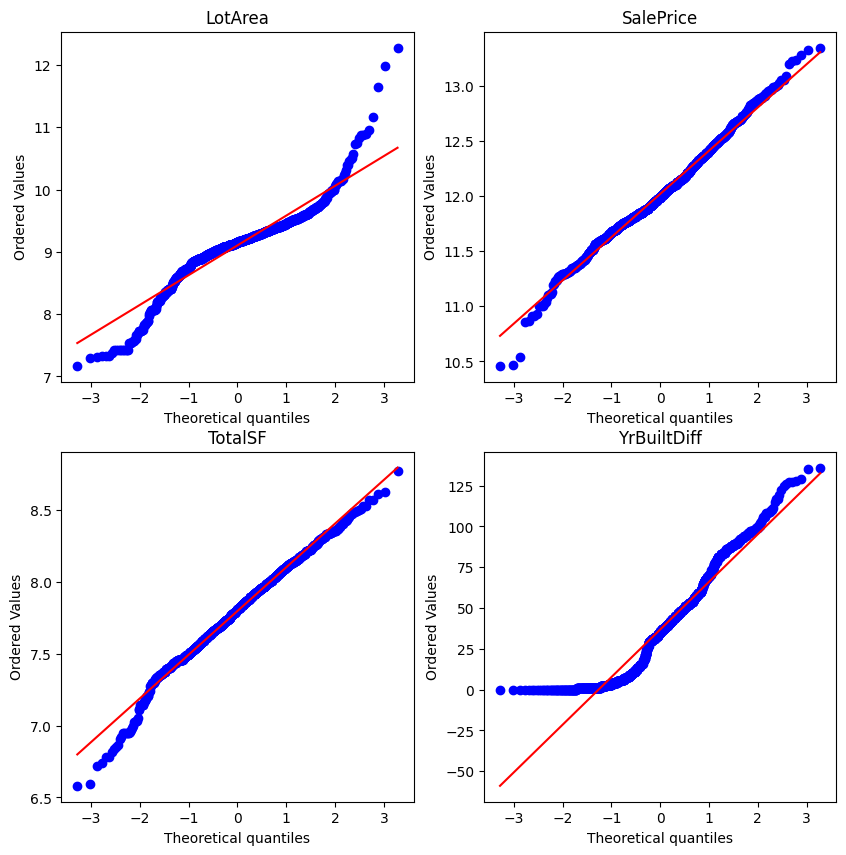

In [325]:
# 정규성 검정
from scipy.stats import probplot

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate(numeric):
    probplot(train[col], plot=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)

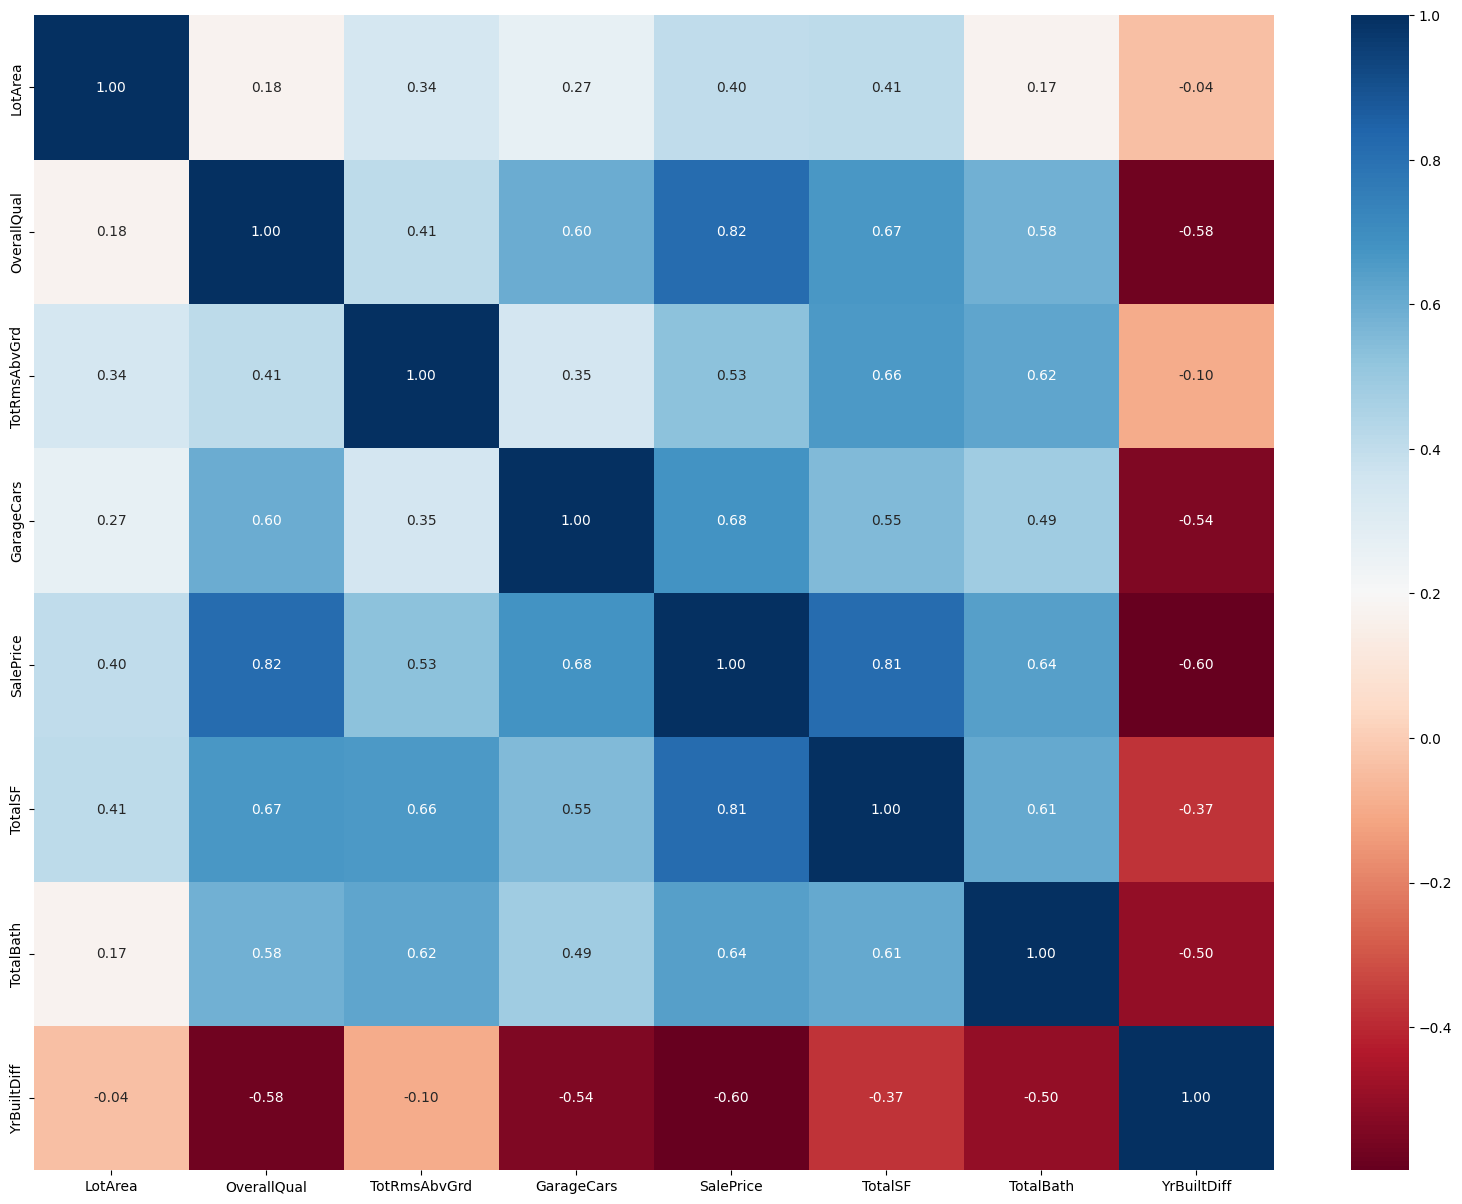

In [326]:
# 상관계수 히트맵
numeric_data = train.select_dtypes(exclude="object")   # 수치형 데이터만 추출
plt.figure(figsize=(20, 15))
#mask = np.zeros_like(numeric_data.corr(), dtype=np.bool_)
#mask[np.triu_indices_from(mask)] = True     # triu_indices_from: 대각선을 기준으로 위쪽 삼각형만 True로 설정
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='RdBu')    # cmap: 색상  # 절반만 표시하고 싶은 경우 mask=mask 옵션 추가
plt.show()

In [327]:
train.shape, test.shape

((1336, 9), (130, 8))

# 전처리

In [328]:
# 결측치 처리
train.fillna('NaN', inplace=True)

In [329]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [330]:
# 중복데이터 확인
train.duplicated().sum()

2

In [331]:
train = train.drop_duplicates(keep='first').reset_index(drop=True)  # 중복 데이터 제거

In [332]:
# target과 feature 분리
X_train = train.drop(['SalePrice'], axis=1)
y_train = train['SalePrice'].reset_index(drop=True)
X_test = test.copy()

In [333]:
# 전처리를 위한 데이터 병합
all_data = pd.concat([X_train, X_test]).reset_index(drop=True)

In [334]:
all_data.shape

(1464, 8)

In [335]:
all_data = pd.get_dummies(all_data)

In [336]:
all_data.shape

(1464, 14)

In [337]:
X_train = all_data.iloc[:len(y_train), :]
X_test = all_data.iloc[len(y_train):, :]
X_train.shape, y_train.shape, X_test.shape

((1334, 14), (1334,), (130, 14))

### 모델링

In [228]:
# 평가지표 정의
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def rmse_cv(model):    
    rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [229]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

> 선형 모델

In [230]:
# Ridge
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=[1.78, 1.79, 1.80, 1.81, 1.82], cv=kfolds))

score1 = rmse_cv(ridge)
print("Ridge: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()), )

ridge_model_full_data = ridge.fit(X_train, y_train)

print('RMSLE score on train data:')
print(rmsle(np.expm1(y_train), np.expm1(ridge_model_full_data.predict(X_train))))

Ridge: 0.1491 (0.0169)

RMSLE score on train data:
27892.07355961312


In [231]:
# Lasso
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=10000000, alphas=[0.00001, 0.00002, 0.00003, 0.00004], random_state=42, cv=kfolds))

score2 = rmse_cv(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()), )

lasso_model_full_data = lasso.fit(X_train, y_train)

print('RMSLE score on train data:')
print(rmsle(np.expm1(y_train), np.expm1(lasso_model_full_data.predict(X_train))))

LASSO: 0.1491 (0.0169)

RMSLE score on train data:
27854.081924062284


In [232]:
# ElasticNet
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=10000000, alphas=[0.0002, 0.00025, 0.00003], cv=kfolds, l1_ratio=[0.3, 0.4, 0.5]))

score3 = rmse_cv(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()), )

elastic_model_full_data = elasticnet.fit(X_train, y_train)

print('RMSLE score on train data:')
print(rmsle(np.expm1(y_train), np.expm1(elastic_model_full_data.predict(X_train))))

elastic net: 0.1491 (0.0169)

RMSLE score on train data:
27864.25385090227


> 커널형 모델

In [233]:
# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 9.3, epsilon= 0.0143, gamma=0.0008,))

score4 = rmse_cv(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()), )

svr_model_full_data = svr.fit(X_train, y_train)

print('RMSLE score on train data:')
print(rmsle(np.expm1(y_train), np.expm1(svr_model_full_data.predict(X_train))))

SVR: 0.1496 (0.0177)

RMSLE score on train data:
27904.63422451511


In [234]:
# Kernel Ridge Regressor
KRR = KernelRidge(alpha=0.001, kernel='polynomial', degree=1, coef0=2.5)

score5 = rmse_cv(KRR)
print("Kernel Ridge: {:.4f} ({:.4f})\n".format(score5.mean(), score5.std()), )

KRR_model_full_data = KRR.fit(X_train, y_train)

print('RMSLE score on train data:')
print(rmsle(np.expm1(y_train), np.expm1(KRR_model_full_data.predict(X_train))))

Kernel Ridge: 0.1491 (0.0168)

RMSLE score on train data:
27847.677494142154


> 트리 계열

In [249]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=627, learning_rate=0.01, max_depth=14, max_features='sqrt', min_samples_leaf=25, min_samples_split=8, random_state =42)  

score6 = rmse_cv(gbr)
print("Gradient Boosting: {:.4f} ({:.4f})\n".format(score6.mean(), score6.std()), )

gbr_model_full_data = gbr.fit(X_train, y_train)

print('RMSLE score on train data:')
print(rmsle(np.expm1(y_train), np.expm1(gbr_model_full_data.predict(X_train))))

Gradient Boosting: 0.1473 (0.0172)

RMSLE score on train data:
20787.66208799746


In [256]:
# XGBoost
from xgboost import XGBRegressor

model_xgb = XGBRegressor(learning_rate=0.01,n_estimators=3460, max_depth=3, min_child_weight=0,
                         gamma=0, subsample=0.7, colsample_bytree=0.7, nthread=-1,
                         scale_pos_weight=1, seed=27, reg_alpha=0.00006)

score7 = rmse_cv(model_xgb)
print("Xgboost: {:.4f} ({:.4f})\n".format(score7.mean(), score7.std()), )

xgb_model_full_data = model_xgb.fit(X_train, y_train)

print('RMSLE score on train data:')
print(rmsle(np.expm1(y_train), np.expm1(xgb_model_full_data.predict(X_train))))

Xgboost: 0.1490 (0.0177)

RMSLE score on train data:
16373.533430893047


In [345]:
# submission data 불러오기
print('Predict submission')
submission_origin = pd.read_csv(file_path+'\submission.csv')
submission = submission_origin.copy()

# submission data에 예측값 넣기
submission.iloc[:,1] = (np.expm1(xgb_model_full_data.predict(X_test)))
submission.to_csv('Day2_xgb.csv', index=False)

Predict submission


In [265]:
# LightGBM
from lightgbm import LGBMRegressor

model_lgb = LGBMRegressor(objective='regression', num_leaves=4, learning_rate=0.01, 
                          n_estimators=5000, max_bin=200, bagging_fraction=0.75,
                          bagging_freq=5, bagging_seed=7, feature_fraction=0.2,
                          feature_fraction_seed=7, verbose=-1,)

score8 = rmse_cv(model_lgb)
print("LGBM: {:.4f} ({:.4f})\n" .format(score8.mean(), score8.std()), )

lgb_model_full_data = model_lgb.fit(X_train, y_train)

print('RMSLE score on train data:')
print(rmsle(np.expm1(y_train), np.expm1(lgb_model_full_data.predict(X_train))))

LGBM: 0.1511 (0.0160)

RMSLE score on train data:
22650.67674038697


In [267]:
model_performances = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'ElasticNet', 'SVR', 'Kernel Ridge', 'GradientBoosting', 'XGBoost', 'LightGBM'],
    'Score': [score1.mean(), score2.mean(), score3.mean(), score4.mean(), score5.mean(), score6.mean(), score7.mean(), score8.mean()],
    'Std': [score1.std(), score2.std(), score3.std(), score4.std(), score5.std(), score6.std(), score7.std(), score8.std()]})

In [268]:
model_performances

,Model,Score,Std
0,Ridge,0.149115,0.016877
1,Lasso,0.149112,0.016865
2,ElasticNet,0.149112,0.016901
3,SVR,0.149603,0.017686
4,Kernel Ridge,0.149128,0.016848
5,GradientBoosting,0.147338,0.017189
6,XGBoost,0.148981,0.017666
7,LightGBM,0.153795,0.017765


In [341]:
def blend_models_predict(X):
    return ((0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * lasso_model_full_data.predict(X)) + \
            (0.1 * elastic_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * KRR_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.2 * xgb_model_full_data.predict(X)) + \
            (0.2 * lgb_model_full_data.predict(X)))

In [342]:
print('RMSLE score on train data:')
print(rmsle(y_train, blend_models_predict(X_train)))

RMSLE score on train data:
0.11712353084926673


In [343]:
print('RMSLE score on train data:')
print(rmsle(np.expm1(y_train), np.expm1(blend_models_predict(X_train))))

RMSLE score on train data:
21525.276270494887


In [344]:
# submission data 불러오기
print('Predict submission')
submission_origin = pd.read_csv(file_path+'\submission.csv')
submission = submission_origin.copy()

# submission data에 예측값 넣기
submission.iloc[:,1] = (np.expm1(blend_models_predict(X_test)))
submission.to_csv('Day2_2.csv', index=False)

Predict submission
